In [1]:
import cv2
%config Completer.use_jedi = False
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from skimage import color
from skimage import io

## Prepare the data 

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Directory of images 
DATADIR = os.path.join(os.path.abspath(os.getcwd()),'data')
# Categories or classes to classify
CATEGORIES = ['Boot', 'Sandal','Shoe']

data = []

IMG_SIZE = 100


for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try :
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = color.rgb2gray(new_array)
            data.append([new_array, class_num])
        except Exception as e:
            pass
random.shuffle(data)
X = [] #features
y = [] #labels
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
y = np.asarray(y)
print(X.shape)

hhhh
hhhh
hhhh
hhhh
hhhh
(15008, 100, 100)


(100, 100)
this is a Boot


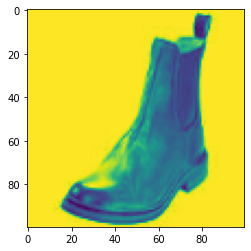

In [3]:
CATEGORIES = ['Boot', 'Sandal','Shoe']
print(X[8].shape)
plt.imshow(X[8])
print('this is a', CATEGORIES[y[8]])

## Creating the CNN model : 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
print(X_train.shape)

(12006, 100, 100)


In [7]:
X_train = X_train.reshape(-1,IMG_SIZE**2)
X_test = X_test.reshape(-1,IMG_SIZE**2)

In [8]:
# Scaling : 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

In [9]:
# Transform labels to categorical columns: 
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten,Conv2D,MaxPool2D, AvgPool2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras.backend as K
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from  scipy import misc

In [11]:
## the model : 

K.clear_session()
model = Sequential()
model.add(Dense(512,input_dim = IMG_SIZE*IMG_SIZE, activation= 'relu'))
model.add(Dense(256,activation= 'relu'))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(3,activation= 'softmax'))



model.compile(Adam(lr=0.01),loss= 'categorical_crossentropy',
              
              metrics=['accuracy'])

In [12]:
h = model.fit(X_train,y_train_cat,epochs=10,batch_size=128,verbose=1,validation_split=0.1)

Train on 10805 samples, validate on 1201 samples
Epoch 1/10
10805/10805 [==============================] - 8s 716us/step - loss: 1.0479 - accuracy: 0.4730 - val_loss: 0.8022 - val_accuracy: 0.5712
Epoch 2/10
10805/10805 [==============================] - 6s 597us/step - loss: 0.7142 - accuracy: 0.6216 - val_loss: 0.6348 - val_accuracy: 0.6944
Epoch 3/10
10805/10805 [==============================] - 6s 589us/step - loss: 0.5333 - accuracy: 0.7706 - val_loss: 0.4304 - val_accuracy: 0.8235
Epoch 4/10
10805/10805 [==============================] - 7s 650us/step - loss: 0.4037 - accuracy: 0.8408 - val_loss: 0.4252 - val_accuracy: 0.8260
Epoch 5/10
10805/10805 [==============================] - 8s 714us/step - loss: 0.3870 - accuracy: 0.8508 - val_loss: 0.3495 - val_accuracy: 0.8659
Epoch 6/10
10805/10805 [==============================] - 7s 638us/step - loss: 0.3364 - accuracy: 0.8719 - val_loss: 0.3475 - val_accuracy: 0.8693
Epoch 7/10
10805/10805 [==============================] - 9s 79

In [13]:
## Summary of the layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 5,288,963
Trainable params: 5,288,963
Non-trainable params: 0
_________________________________________________________________


In [14]:
## Model evaluation (loss and accuracy)
model.evaluate(X_test,y_test_cat)

3002/3002 [==============================] - 1s 296us/step


[0.3844680262358486, 0.8487674593925476]

## Prediction : 

In [15]:
y_pred = model.predict(X_test)
y_pred

array([[4.51879129e-02, 8.53313148e-01, 1.01498924e-01],
       [1.78391521e-03, 7.99285054e-01, 1.98931113e-01],
       [9.69736755e-01, 1.05434507e-02, 1.97197311e-02],
       ...,
       [9.96538520e-01, 2.39581265e-03, 1.06576062e-03],
       [1.49775865e-02, 2.11645305e-01, 7.73377061e-01],
       [8.05641524e-04, 9.45018947e-01, 5.41754626e-02]], dtype=float32)

In [16]:
idx = np.argmax(y_pred, axis=-1)
y_pred_cat = np.zeros( y_pred.shape )
y_pred_cat[ np.arange(y_pred.shape[0]), idx] = 1
y_pred_cat

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [17]:
y_test_cat = y_test_cat.argmax(axis=1)
y_pred_cat = y_pred_cat.argmax(axis=1)

## Confusion matrix : 

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_cat, y_pred_cat)

array([[985,   3,  38],
       [ 98, 655, 260],
       [ 45,  10, 908]])

## Classification report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cat,y_pred_cat))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1026
           1       0.98      0.65      0.78      1013
           2       0.75      0.94      0.84       963

    accuracy                           0.85      3002
   macro avg       0.87      0.85      0.84      3002
weighted avg       0.87      0.85      0.84      3002



Text(0.5, 1.0, 'loss')

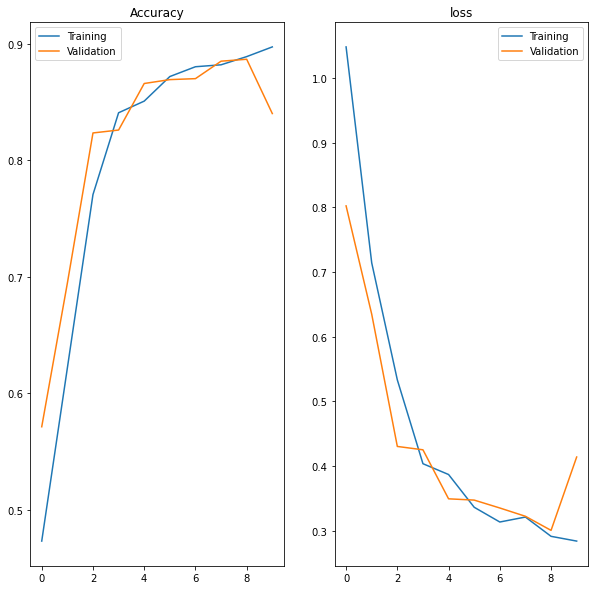

In [20]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('loss')